In [78]:
from sklearn import (
    linear_model,
    model_selection,
    metrics
)
from pandas_datareader import data as web
from chemaphy import Statistics as stats
from plotly import express as exp
from matplotlib import (
    pyplot as plt,
    style
)
import datetime as dt
import pandas as pd
import numpy as np

In [79]:
data = web.DataReader("TTM","yahoo",start=dt.datetime(2010,1,1),end=dt.datetime.now())
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,17.080000,16.830000,16.940001,16.860001,586100.0,15.805061
2010-01-04,18.090000,17.490000,17.570000,18.030001,2141700.0,16.901852
2010-01-05,17.900000,17.620001,17.780001,17.850000,2022500.0,16.733114
2010-01-06,18.010000,17.770000,17.900000,17.990000,2057800.0,16.864351
2010-01-07,17.629999,17.340000,17.389999,17.570000,2706800.0,16.470633
...,...,...,...,...,...,...
2022-10-10,23.920000,23.370001,23.770000,23.610001,913900.0,23.610001
2022-10-11,23.889999,23.420000,23.430000,23.469999,873500.0,23.469999
2022-10-12,23.840000,23.490000,23.790001,23.670000,706300.0,23.670000


In [96]:
x = data.drop(columns = "Adj Close")
y = data["Adj Close"]

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.1)
model = linear_model.LinearRegression()
model.fit(xtrain,ytrain)
p = model.predict(xtest)
stats.Accuracy(np.asarray(ytest),np.asarray(p))

0.7391304347826086

In [97]:
metrics.r2_score(ytest,p)

0.9986247748472243

Text(0, 0.5, 'Adjusted Closing Price')

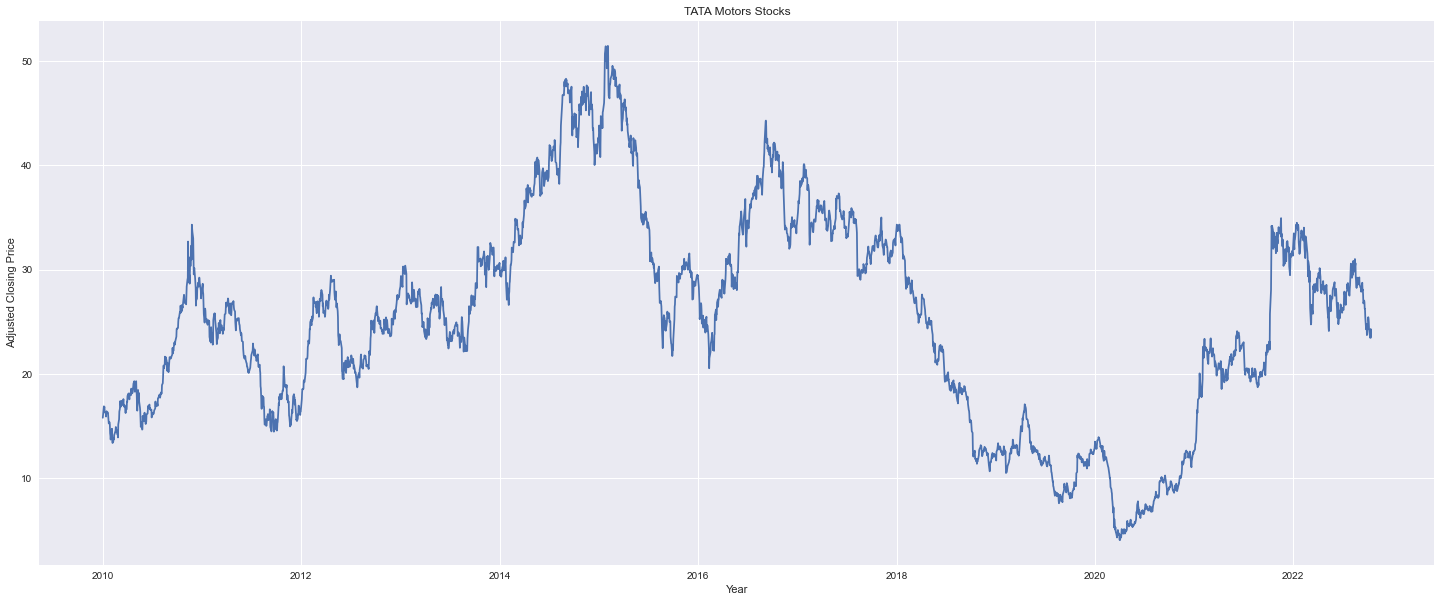

In [98]:
# exp.line(data,x = data.index,y = data["Adj Close"],title="TATA Motors")
plt.figure(figsize=(25,10))
plt.grid(True)
plt.plot(data.index,data["Adj Close"])
plt.title("TATA Motors Stocks")
plt.xlabel("Year")
plt.ylabel("Adjusted Closing Price")

Text(0, 0.5, 'Predicted Adjusted Closing Price')

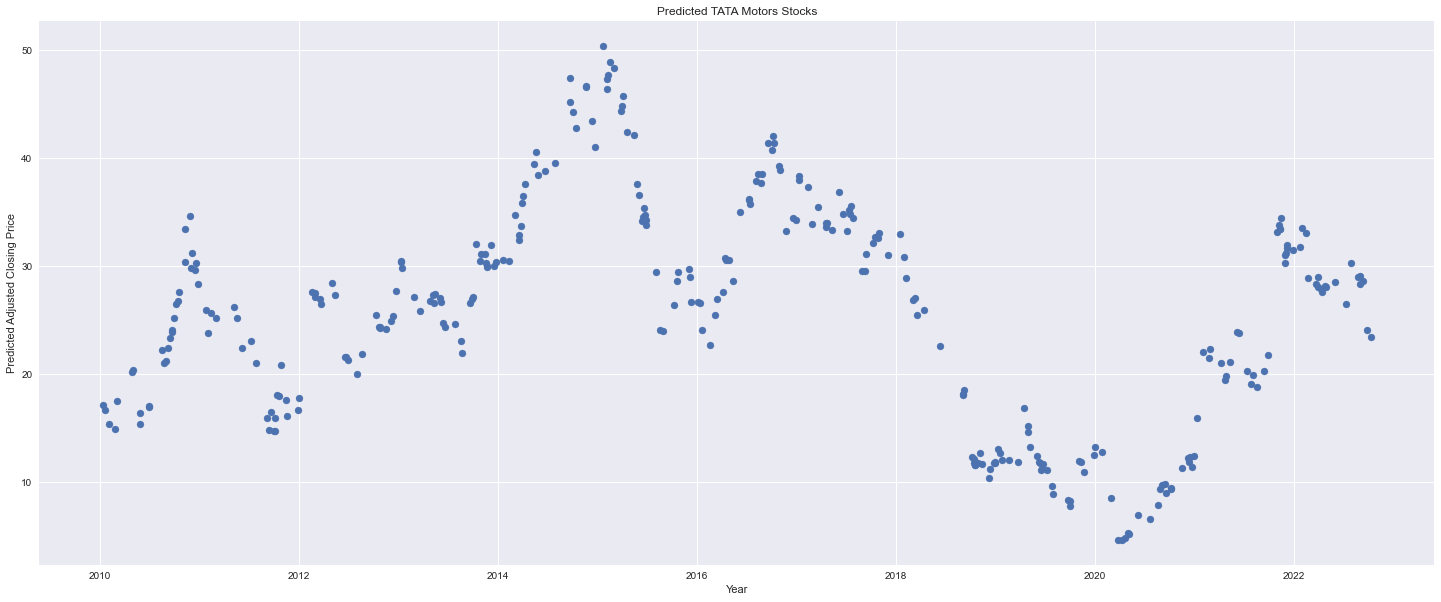

In [99]:
# exp.scatter(xtest.sort_index(),x = xtest.index,y = p,title = "TATA Motors Predicted Values")
plt.figure(figsize=(25,10))
plt.grid(True)
plt.scatter(xtest.index,p)
plt.title("Predicted TATA Motors Stocks")
plt.xlabel("Year")
plt.ylabel("Predicted Adjusted Closing Price")

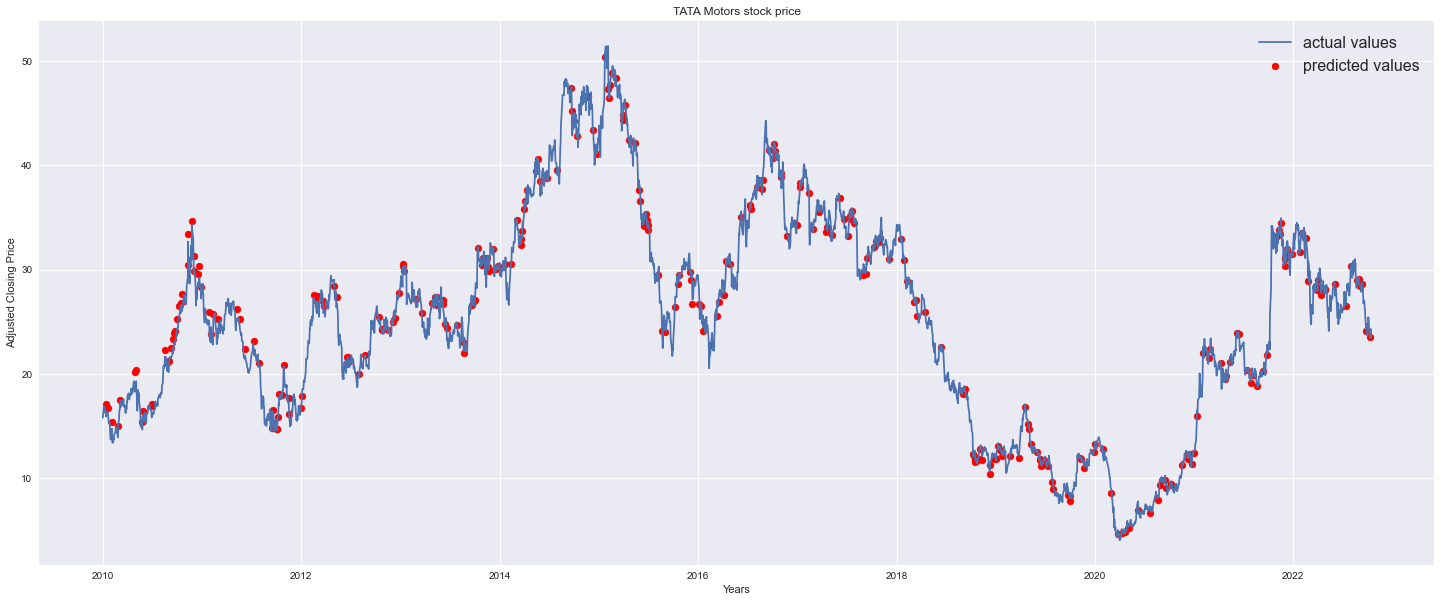

In [100]:
plt.figure(figsize=(25,10))
plt.grid(True)
plt.plot(data.index,data["Adj Close"],label="actual values")
plt.scatter(xtest.index,p,color="red",label="predicted values")
plt.title("TATA Motors stock price")
plt.xlabel("Years")
plt.ylabel("Adjusted Closing Price")
plt.legend(loc="best",prop={"size":16})

In [101]:
stats.MeanSquaredError(actual=np.asarray(ytest),predicted=np.asarray(p))

0.14001483161979342

In [102]:
metrics.mean_squared_error(ytest,p)

0.14001483161979353

In [103]:
stats.RootMeanSquaredError(actual=np.asarray(ytest),predicted=np.asarray(p))

0.37418555773812734

In [105]:
avg_error = stats.MeanError(actual=np.asarray(ytest),predicted=np.asarray(p))
avg_error

-0.0038677834773756044

In [107]:
stats.Absolute(avg_error)

0.0038677834773756044